In [2]:
## import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [3]:
## load the data

from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [4]:
## visualize the shapes of all the datas
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

[7]


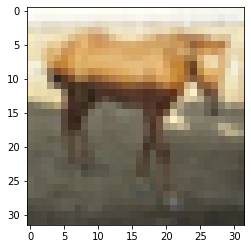

In [8]:
## example of one image data
i = 2000
plt.imshow(X_train[i])
print(y_train[i])

/opt/anaconda3/envs/my/lib/python3.6/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


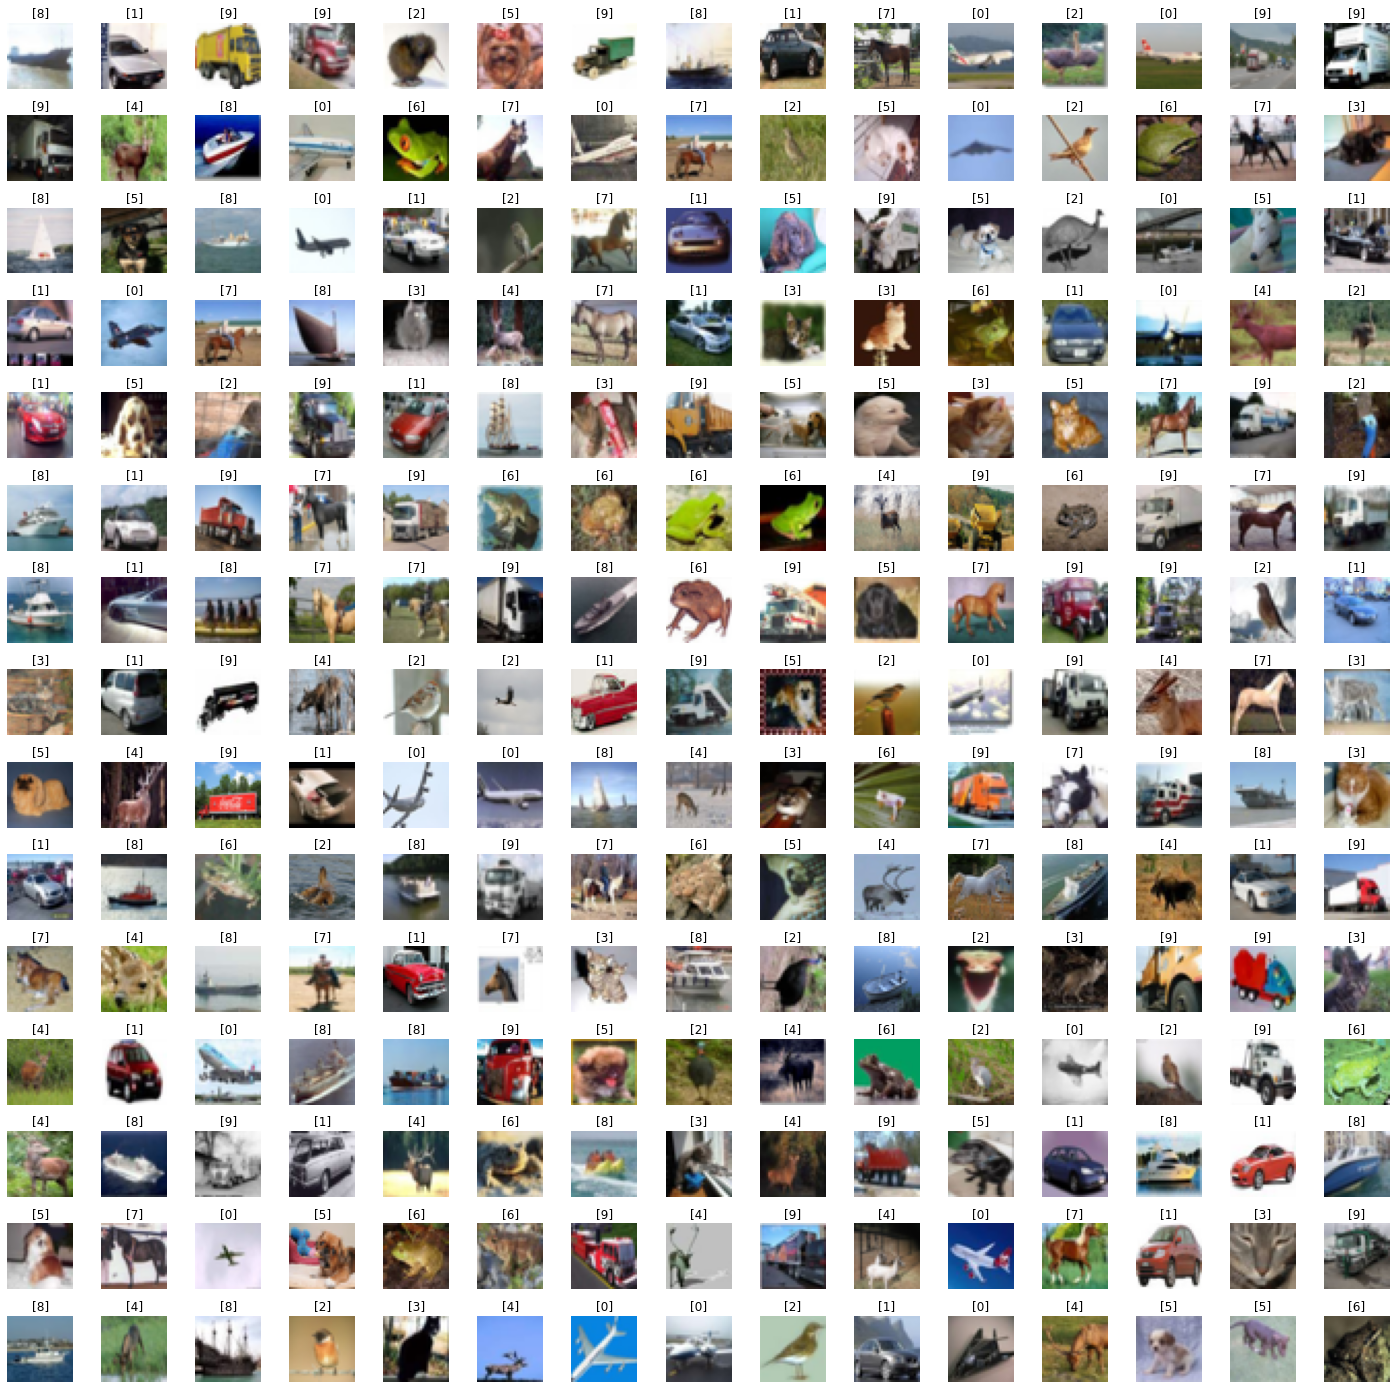

In [9]:
## more image data using matplotlib 
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize=(25, 25))
axes = axes.ravel()

n_training = len(X_train)


for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [10]:
n_training

50000

In [11]:
## converting the data to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [12]:
number_cat = 10 

In [13]:
## actual class consist of decimal values, now we will convert it to binary values
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [14]:
# now we will convert it to binary values
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)

In [15]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [16]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
# normalisation 
X_train = X_train / 255
X_test = X_test / 255


In [18]:
X_train.shape

(50000, 32, 32, 3)

In [19]:
Input_shape = X_train.shape[1:]

In [20]:
Input_shape

(32, 32, 3)

In [21]:
## build the model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [22]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=Input_shape))
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPool2D(2, 2))
cnn_model.add(Dropout(0.3))


cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPool2D(2, 2))
cnn_model.add(Dropout(0.2))


cnn_model.add(Flatten())

cnn_model.add(Dense(units=512, activation='relu'))
cnn_model.add(Dense(units=512, activation='relu'))

cnn_model.add(Dense(units=10, activation='softmax'))


In [23]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
cnn_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.rmsprop(lr=0.001), metrics=['accuracy'])

In [25]:
history = cnn_model.fit(X_train, y_train, batch_size=32, epochs=1, shuffle=True)

Epoch 1/1
50000/50000 [==============================] - 97s 2ms/step - loss: 1.5520 - accuracy: 0.4397


In [26]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test accuracy: {}'.format(evaluation[1]))

10000/10000 [==============================] - 8s 803us/step
Test accuracy: 0.5533999800682068


In [27]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([3, 1, 8, ..., 7, 1, 7])

In [32]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [33]:
y_test = y_test.argmax(1)

In [34]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

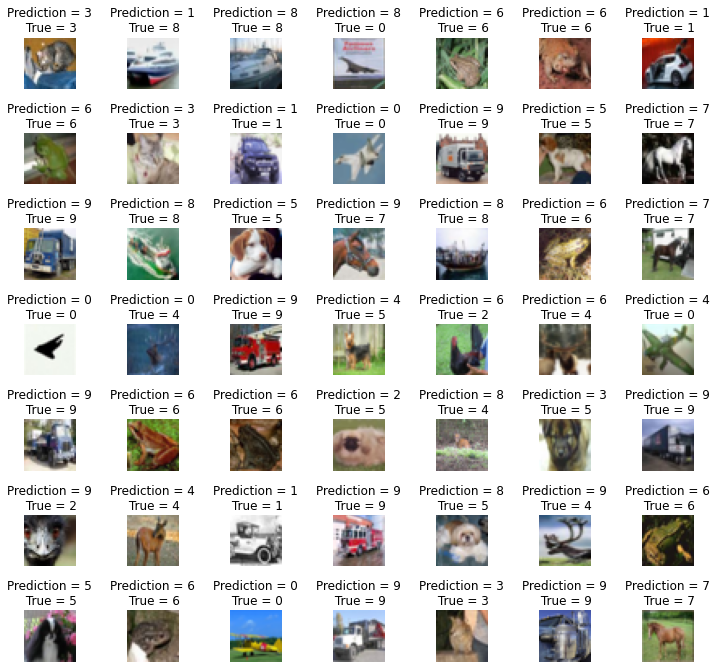

In [35]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=1)

<AxesSubplot:>

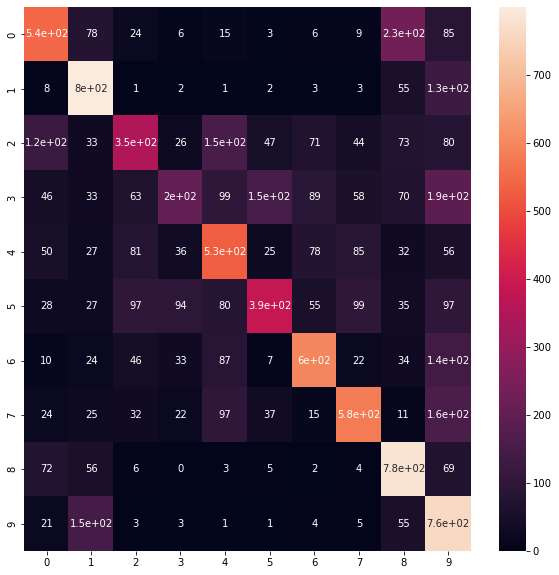

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True)

In [37]:
## saving the model
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

## some code testing you can skip 

In [34]:
# import keras
# from keras.datasets import cifar10
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [35]:
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')

In [36]:
# X_test.shape

(10000, 32, 32, 3)

In [37]:
# n = 15
# X_train_sample = X_train[:n]

In [38]:
# X_train_sample.shape

(15, 32, 32, 3)

In [57]:
# from keras.preprocessing.image import ImageDataGenerator
# datagen_train = ImageDataGenerator(rotation_range=90, horizontal_flip=True, height_shift_range=0.5)
# datagen_train.fit(X_train_sample)

In [58]:
# def toimage(arr):
#     from PIL import Image
#     return Image.fromarray(arr.astype(np.uint8))


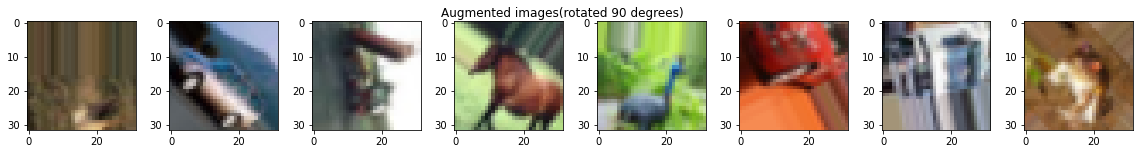

In [59]:
# fig = plt.figure(figsize=(20, 2))
# for x_batch in datagen_train.flow(X_train_sample, batch_size=n):
#     for i in range(0, n):
#         ax = fig.add_subplot(1, n, i+1)
#         ax.imshow(toimage(x_batch[i]))
#     fig.suptitle('Augmented images(rotated 90 degrees)')
#     plt.show()
#     break

## with image augmentation

In [28]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

In [29]:
datagen.fit(X_train)

In [30]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), epochs=1)

Epoch 1/1
1563/1563 [==============================] - 119s 76ms/step - loss: 1.7228 - accuracy: 0.3803


In [31]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

10000/10000 [==============================] - 8s 836us/step
Test accuracy 0.4577000141143799


In [38]:
## saving the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)